# Tutorial 1

- Taylor polynomial
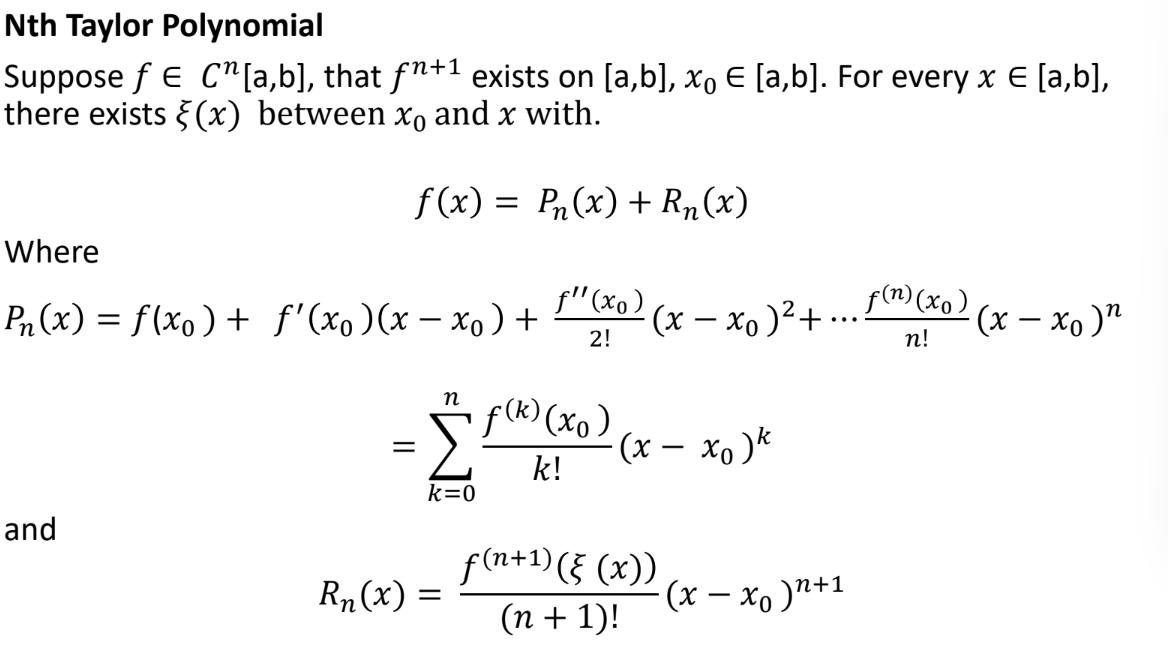
- Maclaurin polynomial (when x0 =0)
- Truncation error |f(x)-Pn(x)| = Rn(x)
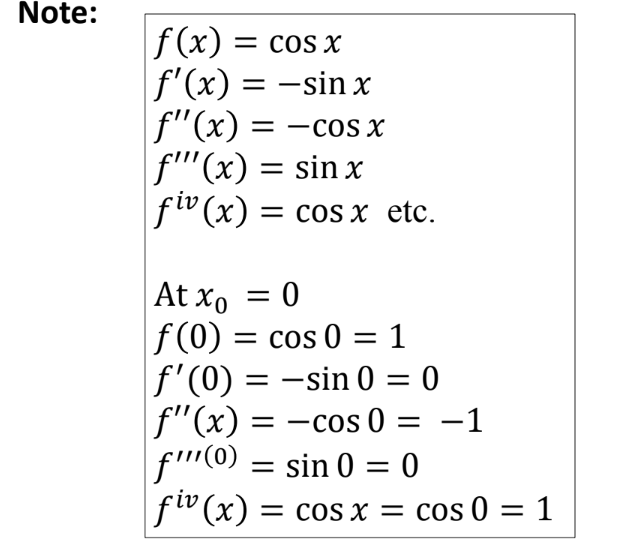

In [1]:
# Import
import math
import sympy as sp

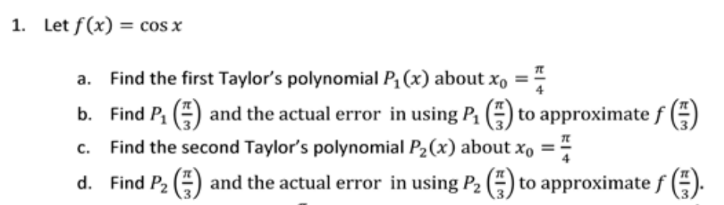

In [2]:
# Function to calculate Taylor polynomial up to n-th degree
def taylor_polynomial(f, f_derivatives, x0, x, n):
    taylor_sum = 0
    for i in range(n + 1):
        term = (f_derivatives[i](x0) / math.factorial(i)) * (x - x0)**i
        taylor_sum += term
    return taylor_sum

# Function to compute truncation error (difference between actual and approximation)
def truncation_error(f, taylor_approximation, x):
    actual_value = f(x)
    return abs(actual_value - taylor_approximation)

# Define the function f(x) = cos(x) and its derivatives
def f_cos(x):
    return math.cos(x)

def f_cos_prime(x):
    return -math.sin(x)

def f_cos_double_prime(x):
    return -math.cos(x)

# Add more derivatives as needed
f_derivatives = [f_cos, f_cos_prime, f_cos_double_prime]

In [3]:
# 1(a) & (b)
x0 = math.pi /4       # Taylor expansion around π/4
x_value = math.pi/3   # Value to approximate using the Taylor series
n = 1                 # Degree of the Taylor

# Compute Taylor polynomial approximation
taylor_approx1 = taylor_polynomial(f_cos, f_derivatives, x0, x_value, n)\

# Compute actual value of cos(x) at x = π/3
actual_value1 = f_cos(x_value)

# Compute truncation error
trunc_error1 = truncation_error(f_cos, taylor_approx1, x_value)

print("Taylor Polynomial Approximation:", taylor_approx1)
print("Actual Value:", actual_value1)
print("Truncation Error:", trunc_error1)

Taylor Polynomial Approximation: 0.5219866587632824
Actual Value: 0.5000000000000001
Truncation Error: 0.02198665876328232


In [4]:
# 1(c) & (d)
x0 = math.pi /4       # Taylor expansion around π/4
x_value = math.pi/3   # Value to approximate using the Taylor series
n = 2                 # Degree of the Taylor

# Compute Taylor polynomial approximation
taylor_approx2 = taylor_polynomial(f_cos, f_derivatives, x0, x_value, n)\

# Compute actual value of cos(x) at x = π/3
actual_value2 = f_cos(x_value)

# Compute truncation error
trunc_error2 = truncation_error(f_cos, taylor_approx2, x_value)

print("Taylor Polynomial Approximation:", taylor_approx2)
print("Actual Value:", actual_value2)
print("Truncation Error:", trunc_error2)

Taylor Polynomial Approximation: 0.4977544914034252
Actual Value: 0.5000000000000001
Truncation Error: 0.0022455085965749078


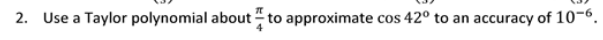

In [5]:
# Function to compute the Taylor series for cos(x) up to a desired accuracy
def taylor_cos_approx(x, tolerance):
    term = 1  # First term in cos(x) Taylor series is 1
    approximation = 1
    n = 1

    # Keep adding terms until the next term is smaller than the desired tolerance
    while abs(term) > tolerance:
        term = (-1)**n * (x**(2*n)) / math.factorial(2*n)
        approximation += term
        n += 1

    return approximation, n - 1  # Return approximation and number of terms used


In [6]:
# Convert 42 degrees to radians
x_deg = 42
x_rad = math.radians(x_deg)

# Desired accuracy (tolerance)
tolerance = 1e-6

# Compute the Taylor series approximation
approx, num_terms = taylor_cos_approx(x_rad, tolerance)

# Actual value of cos(42°)
actual_value = math.cos(x_rad)

# Error
error = abs(actual_value - approx)

# Print the results
print(f"Taylor Series Approximation: {approx:.6f}")
print(f"Actual Value: {actual_value:.6f}")
print(f"Error: {error:.8f}")

Taylor Series Approximation: 0.743145
Actual Value: 0.743145
Error: 0.00000000


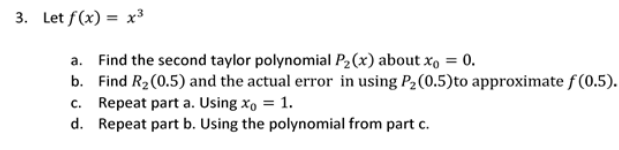

In [7]:
# Taylor polynomial
def generate_taylors_poly_eqn(func, x, x0, n):
    f_k = func
    final_eqn = func.subs(x, x0)
    k = 1
    while k <= n:
        f_k = sp.diff(f_k, x)   # differentiate
        f_k_x0 = f_k.subs(x, x0)    # substitute
        cur_eqn = (f_k_x0 / sp.factorial(k)) * (x - x0)**k
        final_eqn += (cur_eqn)
        k+=1
    return final_eqn

# Remainder error
def generate_Rn(func, x, x0, n):
  f_n_plus_1 = func
  start=1
  while start<=(n+1):
      f_n_plus_1 = sp.diff(f_n_plus_1, x)
      start+=1
  return (f_n_plus_1 / sp.factorial(n+1)) * (x - x0)**(n+1)

In [8]:
# 3(a)
x = sp.Symbol('x')
x0 = 0 # center
f = x**3
P2 = generate_taylors_poly_eqn(f, x, x0, 2)
print(f'P2(x) = {P2}')

P2(x) = 0


In [9]:
# 3(b)
R2 = generate_Rn(f, x, x0, n=2)
act_err = abs(P2.subs(x, 0.5) - f.subs(x, 0.5))
print(f"b. R2(0.5)={R2.subs(x, 0.5).evalf()}   Actual Error={act_err.evalf()}")

b. R2(0.5)=0.125000000000000   Actual Error=0.125000000000000


In [10]:
# 3(c)
x = sp.Symbol('x')
x0 = 1    # center
f = x**3
P2 = generate_taylors_poly_eqn(f, x, x0, n=2)
print(f"c. P2(x)={P2}")

c. P2(x)=3*x + 3*(x - 1)**2 - 2


In [11]:
# 3(d)
R2 = generate_Rn(f, x, x0, n=2)
act_err = abs(P2.subs(x, 0.5) - f.subs(x, 0.5))
print(f"d. R2(0.5)={R2.subs(x, 0.5).evalf()}   Actual Error={act_err.evalf()}")

d. R2(0.5)=-0.125000000000000   Actual Error=0.125000000000000


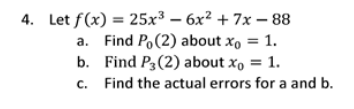

In [12]:
# Taylor polynomial
def generate_taylors_poly_eqn(func, x, x0, n):
    f_k = func
    final_eqn = func.subs(x, x0)
    k = 1
    while k <= n:
        f_k = sp.diff(f_k, x)   # differentiate
        f_k_x0 = f_k.subs(x, x0)    # substitute
        cur_eqn = (f_k_x0 / sp.factorial(k)) * (x - x0)**k
        final_eqn += (cur_eqn)
        k+=1
    return final_eqn

In [13]:
# 4(a)
x = sp.Symbol('x')
x0 = 1
f = 25*x**3 - 6*x**2 + 7*x -88
P0 = generate_taylors_poly_eqn(f, x, x0, 0)
print('P0(2): ', P0.subs(x, 2).evalf())

P0(2):  -62.0000000000000


In [14]:
# 4(b)
x = sp.Symbol('x')
x0 = 1
f = 25*x**3 - 6*x**2 + 7*x -88
P3 = generate_taylors_poly_eqn(f, x, x0, 3)
print('P3(2): ', P3.subs(x, 2).evalf())

P3(2):  102.000000000000


In [15]:
# 4(c)
act_err1 = abs(P0.subs(x, 2) - f.subs(x, 2))
act_err2 = abs(P3.subs(x, 2) - f.subs(x, 2))
print(f"a. Actual Error = {act_err1.evalf()}")
print(f"b. Actual Error = {act_err2.evalf()}")

a. Actual Error = 164.000000000000
b. Actual Error = 0


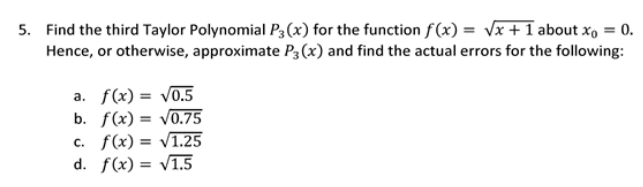

In [16]:
# Taylor polynomial
def generate_taylors_poly_eqn(func, x, x0, n):
    f_k = func
    final_eqn = func.subs(x, x0)
    k = 1
    while k <= n:
        f_k = sp.diff(f_k, x)   # differentiate
        f_k_x0 = f_k.subs(x, x0)    # substitute
        cur_eqn = (f_k_x0 / sp.factorial(k)) * (x - x0)**k
        final_eqn += (cur_eqn)
        k+=1
    return final_eqn

def generate_actual_error(a):
    return abs(P3.subs(x, a-1).evalf() - sp.sqrt(a).evalf())

In [17]:
# 5
x = sp.Symbol('x')
x0 = 0
f = sp.sqrt(x + 1)
P3 = generate_taylors_poly_eqn(f, x, x0, 3)

In [18]:
# 5(a)
actual_error = generate_actual_error(0.5)
print(f'P3(x): ' ,P3.subs(x, 0.5 - 1).evalf())
print(f'Actual Error: ', actual_error )

P3(x):  0.710937500000000
Actual Error:  0.00383071881345243


In [19]:
# 5(b)
actual_error = generate_actual_error(0.75)
print(f'P3(x): ' ,P3.subs(x, 0.75 - 1).evalf())
print(f'Actual Error: ', actual_error )

P3(x):  0.866210937500000
Actual Error:  0.000185533715561403


In [20]:
# 5(c)
actual_error = generate_actual_error(1.25)
print(f'P3(x): ' ,P3.subs(x, 1.25 - 1).evalf())
print(f'Actual Error: ', actual_error )

P3(x):  1.11816406250000
Actual Error:  0.000130073750105097


In [21]:
# 5(d)
actual_error = generate_actual_error(1.5)
print(f'P3(x): ' ,P3.subs(x, 1.5 - 1).evalf())
print(f'Actual Error: ', actual_error )

P3(x):  1.22656250000000
Actual Error:  0.00181762860841106


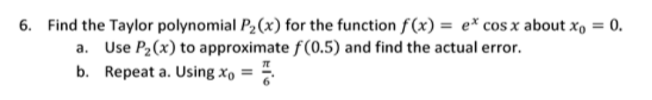

In [22]:
# Taylor polynomial
def generate_taylors_poly_eqn(func, x, x0, n):
    f_k = func
    final_eqn = func.subs(x, x0)
    k = 1
    while k <= n:
        f_k = sp.diff(f_k, x)   # differentiate
        f_k_x0 = f_k.subs(x, x0)    # substitute
        cur_eqn = (f_k_x0 / sp.factorial(k)) * (x - x0)**k
        final_eqn += (cur_eqn)
        k+=1
    return final_eqn

def generate_actual_error(a):
    return abs(P3.subs(x, a-1).evalf() - sp.sqrt(a).evalf())

In [23]:
# 6(a)
x = sp.Symbol('x')
x0 = 0
f = sp.exp(x)*sp.cos(x)
P2 = generate_taylors_poly_eqn(f, x, x0, 2)
print(f"P2(x)={P2}")
print(f'P2(x): ' ,P2.subs(x, 0.5).evalf())

P2(x)=x + 1
P2(x):  1.50000000000000


In [24]:
# 6(b)
x = sp.Symbol('x')
x0 = sp.pi/6
f = sp.exp(x)*sp.cos(x)
P2 = generate_taylors_poly_eqn(f, x, x0, 2)
print(f"P2(x)={P2}")
print(f'P2(x): ' ,P2.subs(x, 0.5).evalf())

P2(x)=-(x - pi/6)**2*exp(pi/6)/2 + (x - pi/6)*(-exp(pi/6)/2 + sqrt(3)*exp(pi/6)/2) + sqrt(3)*exp(pi/6)/2
P2(x):  1.44687901012398


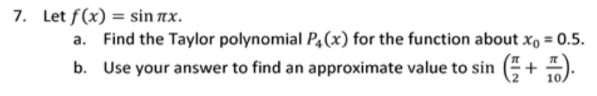

In [25]:
def generate_taylors_poly_eqn(func, x, x0, n):
    f_k = func
    final_eqn = func.subs(x, x0)
    k = 1
    while k <= n:
        f_k = sp.diff(f_k, x)   # differentiate
        f_k_x0 = f_k.subs(x, x0)    # substitute
        cur_eqn = (f_k_x0 / sp.factorial(k)) * (x - x0)**k
        final_eqn += (cur_eqn)
        k+=1
    return final_eqn

In [26]:
# 7(a)
x = sp.Symbol('x')
x0 = 0.5
f = sp.exp(x)*sp.cos(x)
P4 = generate_taylors_poly_eqn(f, x, x0, 4)
print(f"P4(x)={P4}")

P4(x)=0.656449953370554*x - 0.241148172764028*(x - 0.5)**4 - 0.745776039932595*(x - 0.5)**3 - 0.790439083213615*(x - 0.5)**2 + 1.11866405989889


In [27]:
# 7(b)
# Substitute the value pi/2 + pi/10 into the Taylor polynomial
x_value = sp.pi / 2 + sp.pi / 10
approx_value = P4.subs(x, x_value)

# Output the results
print(f"P4({x_value}) = {approx_value.evalf()}")

P4(3*pi/5) = -2.02845529957121


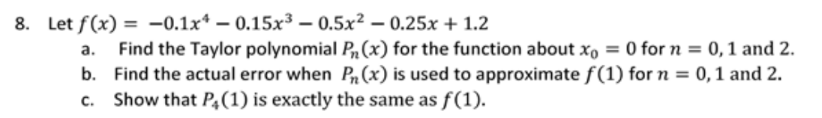

In [28]:
def generate_taylors_poly_eqn(func, x, x0, n):
    f_k = func
    final_eqn = func.subs(x, x0)
    k = 1
    while k <= n:
        f_k = sp.diff(f_k, x)   # differentiate
        f_k_x0 = f_k.subs(x, x0)    # substitute
        cur_eqn = (f_k_x0 / sp.factorial(k)) * (x - x0)**k
        final_eqn += (cur_eqn)
        k+=1
    return final_eqn

In [29]:
# 7(a)
x = sp.Symbol('x')
x0 = 0
f = -0.1*x**4 - 0.15*x**3 - 0.5*x**2 - 0.25*x + 1.2
P0 = generate_taylors_poly_eqn(f, x, x0, 0)
P1 = generate_taylors_poly_eqn(f, x, x0, 1)
P2 = generate_taylors_poly_eqn(f, x, x0, 2)
print(f"P0(x)={P0}")
print(f"P1(x)={P1}")
print(f"P2(x)={P2}")

P0(x)=1.20000000000000
P1(x)=1.2 - 0.25*x
P2(x)=-0.5*x**2 - 0.25*x + 1.2


In [30]:
# 7(b)
print(f'P0(x): ' ,P0.subs(x, 1).evalf())
print(f'P1(x): ' ,P1.subs(x, 1).evalf())
print(f'P2(x): ' ,P2.subs(x, 1).evalf())

P0(x):  1.20000000000000
P1(x):  0.950000000000000
P2(x):  0.450000000000000


In [31]:
f1 = f.subs(x,1)
P4 = generate_taylors_poly_eqn(f, x, x0, 4)
print(f'f(1): ', f1)
print(f'P4(x): ' ,P4.subs(x, 1).evalf())
print("P4(x) is equal to f(x)")

f(1):  0.200000000000000
P4(x):  0.200000000000000
P4(x) is equal to f(x)
